## Turtle Hatching Success, Relocated vs. in situ Nests, for Species: Cc and Cm, 1980 - 2018
### Pea Island National Wildlife Refuge
### Outer Banks, North Carolina

In [1]:
# Load libraries, set paths to data, and load turtle nesting data into a pandas dataframe (df):
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from scipy import stats
from statsmodels.formula.api import ols

data_path = '../Sample_Data/'
xlsx_file = 'Pea Island Sea Turtle Summary 1980_2018.xlsx'

df = pd.read_excel(data_path+xlsx_file)

In [2]:
# Have a look at what's inside df:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 16 columns):
Beach                   997 non-null object
County                  997 non-null object
Activity #              997 non-null int64
Activity                997 non-null object
Nest #                  595 non-null float64
Activity Date           997 non-null datetime64[ns]
Year                    997 non-null int64
Species                 997 non-null object
Latitude                994 non-null float64
Longitude               994 non-null float64
Relocation              595 non-null object
Relocation Date         403 non-null datetime64[ns]
Relocation Latitude     239 non-null float64
Relocation Longitude    239 non-null float64
Hatch Success           555 non-null float64
Emergence Success       555 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 124.7+ KB


In [3]:
# replace NaN with in situ for missing entries in Relocation column:
df['Relocation'].fillna('in situ', inplace=True)

### Plot hatch and emergence success for Cc and Cm species, for relocated and in situ nest sites

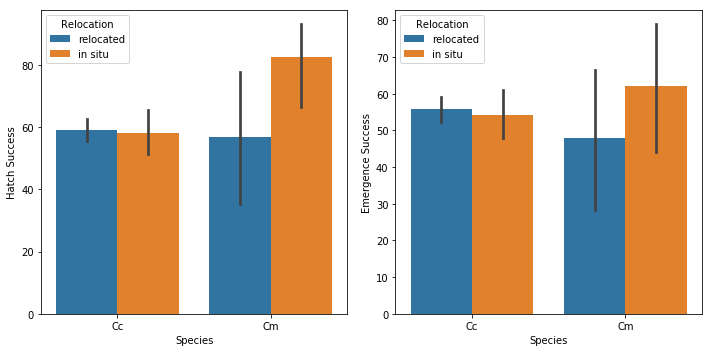

In [4]:
# Plot hatch and emergence success for Cc and Cm species for relocated and in situ nests:

fig0 = plt.figure(figsize=(10,5))
ax0 = fig0.add_subplot(121)
ax1 = fig0.add_subplot(122)

sb.barplot(x='Species', y='Hatch Success', hue='Relocation', data=df, ax=ax0)
sb.barplot(x='Species', y='Emergence Success', hue='Relocation', data=df, ax=ax1)
plt.tight_layout()

The plots suggest that species Cc is at least somewhat less sensitive to nest relocation than are its Cm brethren. Left alone, species Cm enjoys a higher degree of hatching success than does Cc, but move the nest and hatching drops to levels more comparable to Cc. Cm emergence successes, on par with Cc when the next remains undisturbed, drop below Cc levels with disturbance. 

The decloine in successful hatchings in the Cm group between undisturbed and disturbed nest sites seems important. Are these differences significant?

Let's run a two-sample Student's T to find out:

$ H_0$ = there is no cogent evidence to support the argument that a significant difference exists between disturbed and undisturbed Cm nests on hatching success </br>
$ H_1$ = there is evidence to support the argument that differences do exist for nests disturbed by relocation vs. those that remain in situ, and so we are justified in rejecting $H_0 $ </br>
$\alpha = 0.5$

In [5]:
stats.ttest_ind(df['Hatch Success'].loc[(df['Species']=='Cm') & (df['Relocation']=='relocated')], \
                df['Hatch Success'].loc[(df['Species']=='Cm') & (df['Relocation']=='in situ')], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=-1.8830199388203286, pvalue=0.07670693155517172)

p = 0.08. At $\alpha = 0.5$ we are not inclined to reject $H_0$ and so would reasonably conclude that there is no real difference between Cm nest disturbed vs. those left alone. 

Why?

If we look at the number of data samples for Cc vs. Cm in the turtles nesting database we find that for the former (Cc) there are more than 500 entries. For the latter, on the other hand, there are but 23. Hmm... 

!

Question 2: Is there a detectable difference between turtle hatching and emergence success before and after the summer, 2014 renourishment between the two turtle species?

In [6]:
# subset df to include only the area of the PINWR that was part of the 2014-2016 study area. This would
# include the sites from T16 in the south to C11 in the north:
df_site = df.loc[df['Latitude'] <= 35.65037]

# Add a new column 'PrePost'to df to indicate which observations occurred prior to renourishment (before)
# and which came after (after):
df_site.loc[df_site['Activity Date'] < '2014-07-01', 'PrePost'] = 'Before'
df_site.loc[df_site['Activity Date'] >= '2014-07-01', 'PrePost'] = 'After'

# Add new column (Transect_Type) to identify observation as occuring in treatment or control subregion along the 2014 survey 
# beach:
df_site.loc[(df_site['Latitude'] < 35.654037) & (df_site['Latitude'] > 35.630),  'Transect_Type'] = 'Control'
df_site.loc[(df_site['Latitude'] < 35.630) & (df_site['Latitude'] > 35.605), 'Transect_Type'] = 'Treatment'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


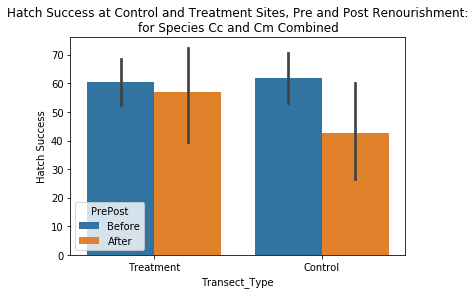

In [7]:
# Now, let's plot something:

# First, Hatch Success for both turtle species Cc and Cm thrown together:
sb.barplot(x='Transect_Type', y='Hatch Success', hue='PrePost', data=df_site)
plt.title('Hatch Success at Control and Treatment Sites, Pre and Post Renourishment:\nfor Species Cc and Cm Combined');

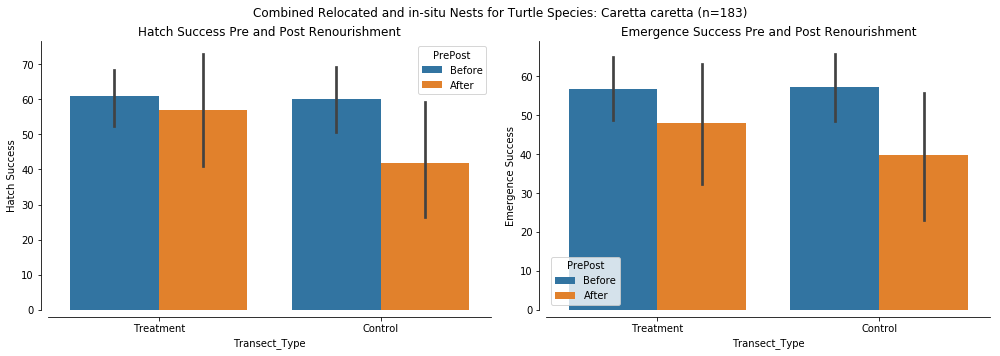

In [8]:
# Let's plot Hatch Success and Emergence Success for the species Cc
df_cc = df_site.loc[df_site['Species'] == 'Cc']

fig01 = plt.figure(figsize=(14,5))
ax10 = fig01.add_subplot(121)
ax11 =fig01.add_subplot(122)

sb.barplot(x='Transect_Type', y='Hatch Success', hue='PrePost', data=df_cc, ax=ax10)
ax10.set_title('\nHatch Success Pre and Post Renourishment')

sb.barplot(x='Transect_Type', y='Emergence Success', hue='PrePost', data=df_cc, ax=ax11)
ax11.set_title('\nEmergence Success Pre and Post Renourishment')

plt.suptitle('Combined Relocated and in-situ Nests for Turtle Species: Caretta caretta (n=183)')
sb.despine(fig=fig01, offset=7, top=True, right=True)
plt.tight_layout();

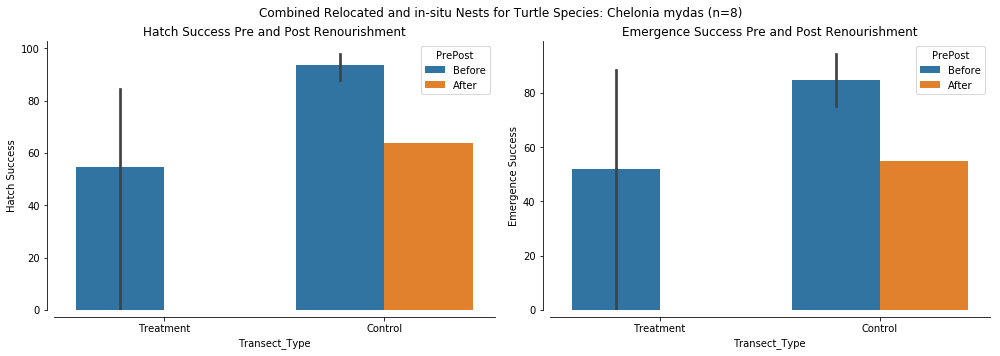

In [9]:
# Let's plot Hatch Success and Emergence Success for the species Cm
df_cm = df_site.loc[df_site['Species'] == 'Cm']

fig02 = plt.figure(figsize=(14,5))
ax20 = fig02.add_subplot(121)
ax21 =fig02.add_subplot(122)

sb.barplot(x='Transect_Type', y='Hatch Success', hue='PrePost', data=df_cm, ax=ax20)
ax20.set_title('\nHatch Success Pre and Post Renourishment')

sb.barplot(x='Transect_Type', y='Emergence Success', hue='PrePost', data=df_cm, ax=ax21)
ax21.set_title('\nEmergence Success Pre and Post Renourishment')

plt.suptitle('Combined Relocated and in-situ Nests for Turtle Species: Chelonia mydas (n=8)')
sb.despine(fig=fig02, offset=7, top=True, right=True)
plt.tight_layout();

<Figure size 1008x360 with 0 Axes>

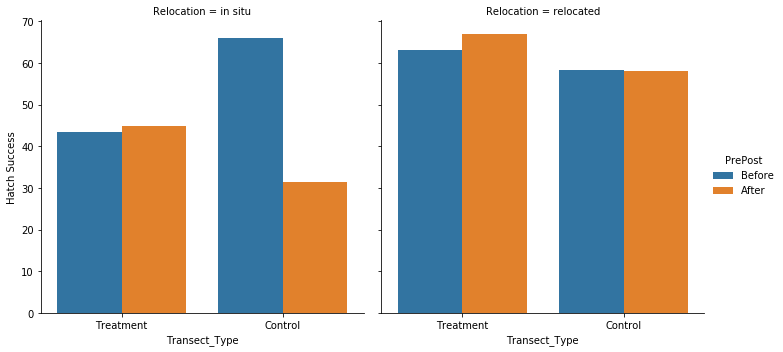

In [10]:
fig03 = plt.figure(figsize=(14,5))
#ax30 = fig03.add_subplot(121)
#ax31 = fig03.add_subplot(figsize=(14,5))

sb.catplot(x='Transect_Type', y='Hatch Success', hue='PrePost', col='Relocation', kind='bar', data=df_cc, ci=None)
#plt.suptitle('Hatch Success for Caretta caretta Nests Relocated vs in-situ')
sb.despine(fig=fig03, offset=7, top=True, right=True);
#plt.tight_layout();

### Based on the differing results seen in the before and after renourishment hatch success rates (as bar heights in the left plot) for the in situ Caretta caretta nests in the control subregion, a first order conclusion is that these are significantly different. But, are they? 

$H_0$: there is no significant difference between hatch success rates before and after beach renourishment in the control subregion of the survey site for Caretta careta nest not relocated prior to hatching

$H_1$: there is a difference between hatch success before and after renourishment for Caretta caretta for nests not moved prior to hatching

In [11]:
stats.ttest_ind(df_cc['Hatch Success'].loc[(df_cc['Transect_Type']=='Control') & 
                                           (df_cc['Relocation']=='in situ') &
                                           (df_cc['PrePost'] == 'Before')],
                df_cc['Hatch Success'].loc[(df_cc['Transect_Type']=='Control') & 
                                           (df_cc['Relocation']=='in situ') &
                                           (df_cc['PrePost'] == 'After')], 
                nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=2.231108888028845, pvalue=0.03421955580030123)

#### Based on a quick-n-dirty two-sample t-test it's not unreasonable to reject $H_0$

But, Why?

In [12]:
# Set index to Activity Date timestamp
df_site.index = df_site['Activity Date']

# Pull the in situ plus control transect obs and aggregate these by calendar year mean values:
df_insitu = df_site.loc[(df_site['Relocation'] == 'in situ') & (df_site['Transect_Type'] =='Control')].resample('AS').mean().copy() 

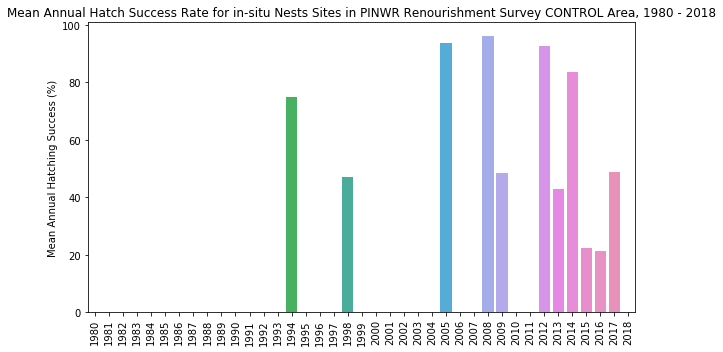

In [13]:
fig04 = plt.figure(figsize=(10,5))
ax40 = fig04.add_subplot(111)

sb.barplot(x=df_insitu.index, y='Hatch Success', data=df_insitu, ax=ax40)

xticks=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]
xticklabels=['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
             '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
             '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
             '2010','2011','2012','2013','2014','2015','2016','2017','2018']
plt.xticks(xticks, xticklabels, rotation=90);

plt.xlabel('')
plt.ylabel('Mean Annual Hatching Success (%)')
plt.title('Mean Annual Hatch Success Rate for in-situ Nests Sites in PINWR Renourishment Survey CONTROL Area, 1980 - 2018')
plt.tight_layout()

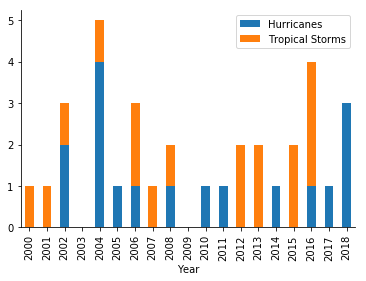

In [67]:
storms = 'Storms Impacting NC 2000 - 2018 cnts.csv'
df_storms = pd.read_csv(data_path+storms)
df_storms = df_storms.set_index('Year')
df_storms.plot(kind='bar', stacked=True)
sb.despine(top=True, right=True)

In [59]:
df_storms


,Year,Hurricanes,Tropical Storms
0,2000,0,1
1,2001,0,1
2,2002,2,1
3,2003,0,0
4,2004,4,1
5,2005,1,0
6,2006,1,2
7,2007,0,1
8,2008,1,1
9,2009,0,0
